In [1]:
import pandas as pd

In [7]:
import pandas as pd

# downloaded csv file & added to the colab menualy
file_path = '/content/Au_nanoparticle_dataset.csv'

df = pd.read_csv(file_path)

filtered_df = df[['N_total', 'N_bulk', 'N_surface', 'R_avg']]

# Display the first few rows to confirm
filtered_df.head(20)


,N_total,N_bulk,N_surface,R_avg
0,1599,1014,585,17.3706
1,1642,1034,608,17.6061
2,4637,3365,1272,25.3692
3,7189,5292,1897,29.7011
4,11004,8508,2496,34.2831
5,13375,10768,2607,36.6334
6,13795,11155,2640,37.0108
7,13947,11304,2643,37.1672
8,14020,11357,2663,37.2103
9,14056,11389,2667,37.2467


In [18]:
mean = filtered_df.mean()
print("mean : ",mean)

std = filtered_df.std()
print("std : ",std)

# Quartiles (25%, 50%, 75%)
quartiles = filtered_df.quantile([0.25, 0.5, 0.75])
print("quartiles : ",quartiles)


mean :  N_total      3476.786500
N_bulk       2521.550250
N_surface     955.236250
R_avg          20.654363
dtype: float64
std :  N_total      3679.286769
N_bulk       2976.232459
N_surface     721.870220
R_avg           7.610716
dtype: float64
quartiles :        N_total   N_bulk  N_surface      R_avg
0.25   1061.0   618.75     437.00  15.160725
0.50   1867.0  1199.00     666.00  18.629250
0.75   4503.0  3183.00    1301.75  25.525125


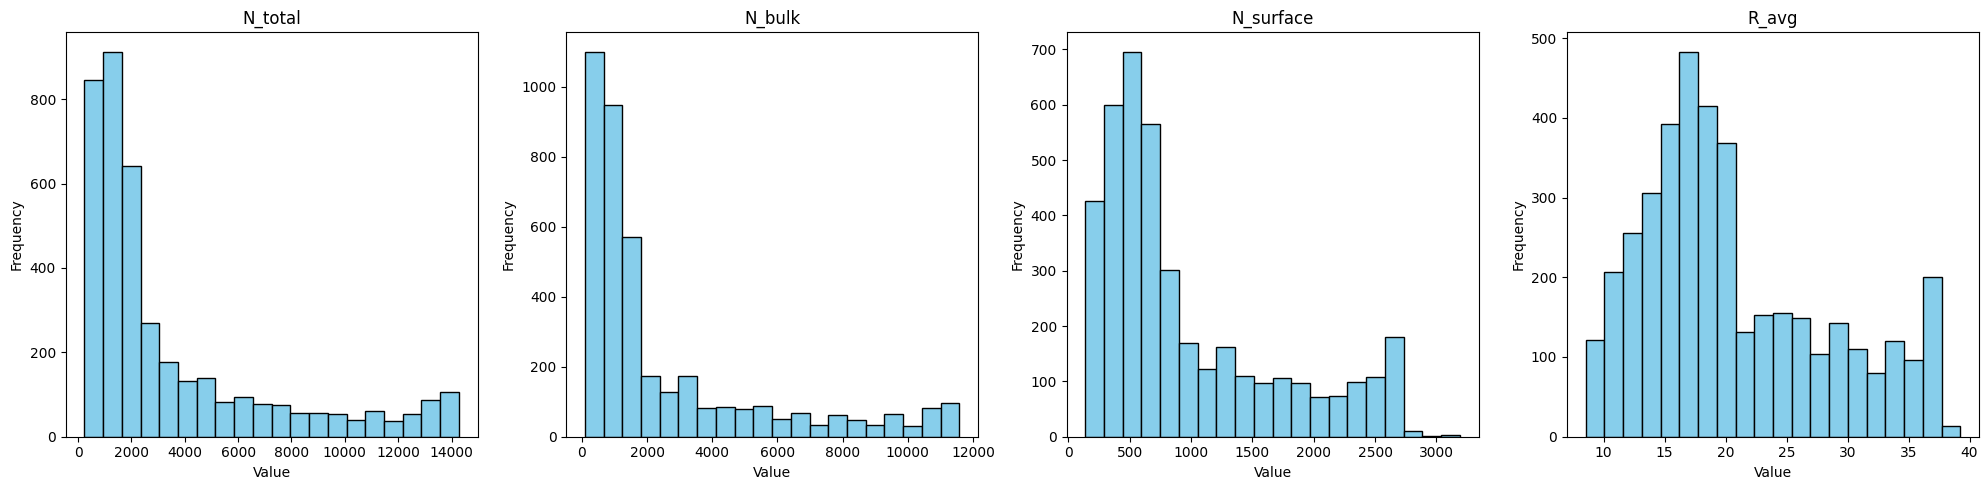

In [17]:
import matplotlib.pyplot as plt

# Create 1x4 subplots
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

# List of columns to plot
columns = ['N_total', 'N_bulk', 'N_surface', 'R_avg']

# Plot each histogram
for i, col in enumerate(columns):
    axes[i].hist(filtered_df[col], bins=20, color='skyblue', edgecolor='black')
    axes[i].set_title(col)
    axes[i].set_xlabel("Value")
    axes[i].set_ylabel("Frequency")


plt.tight_layout()
plt.show()

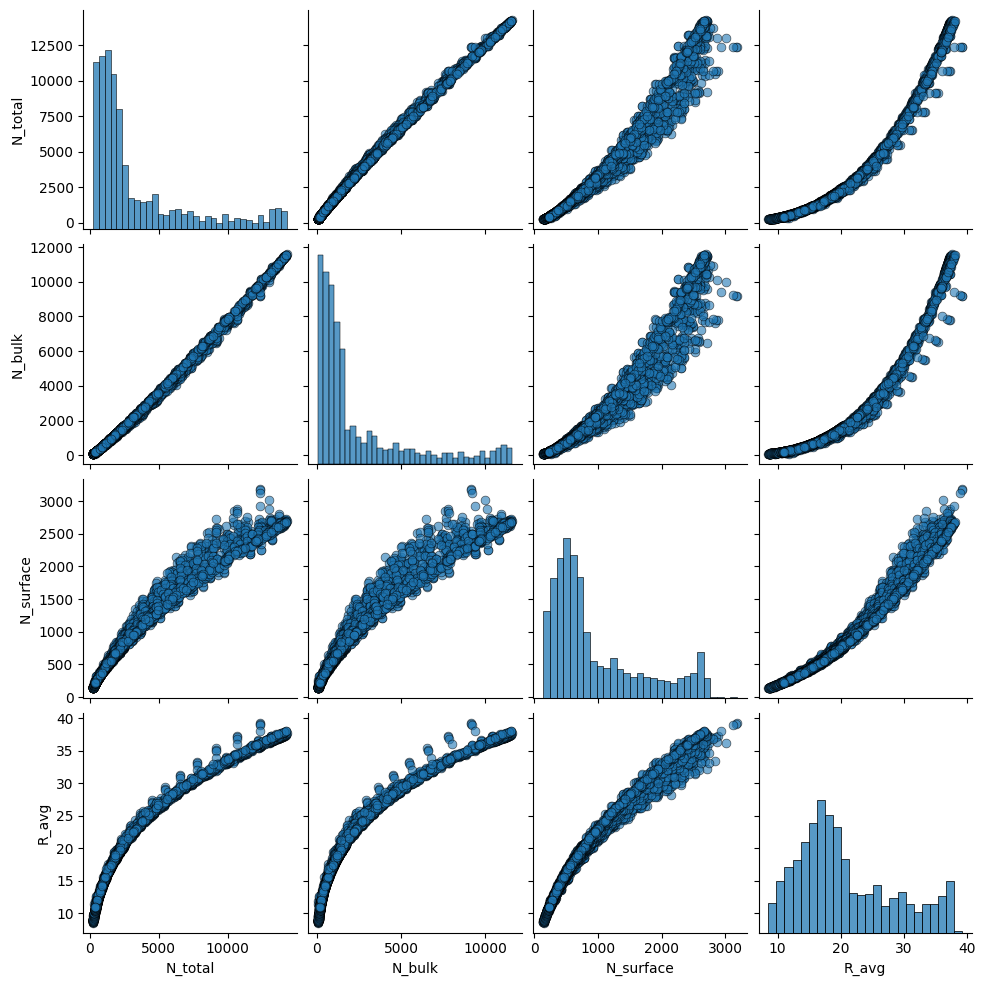

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create pairplot
sns.pairplot(filtered_df, diag_kind="hist", plot_kws={"alpha":0.6, "s":40, "edgecolor":"k"})

# Show plot
plt.show()



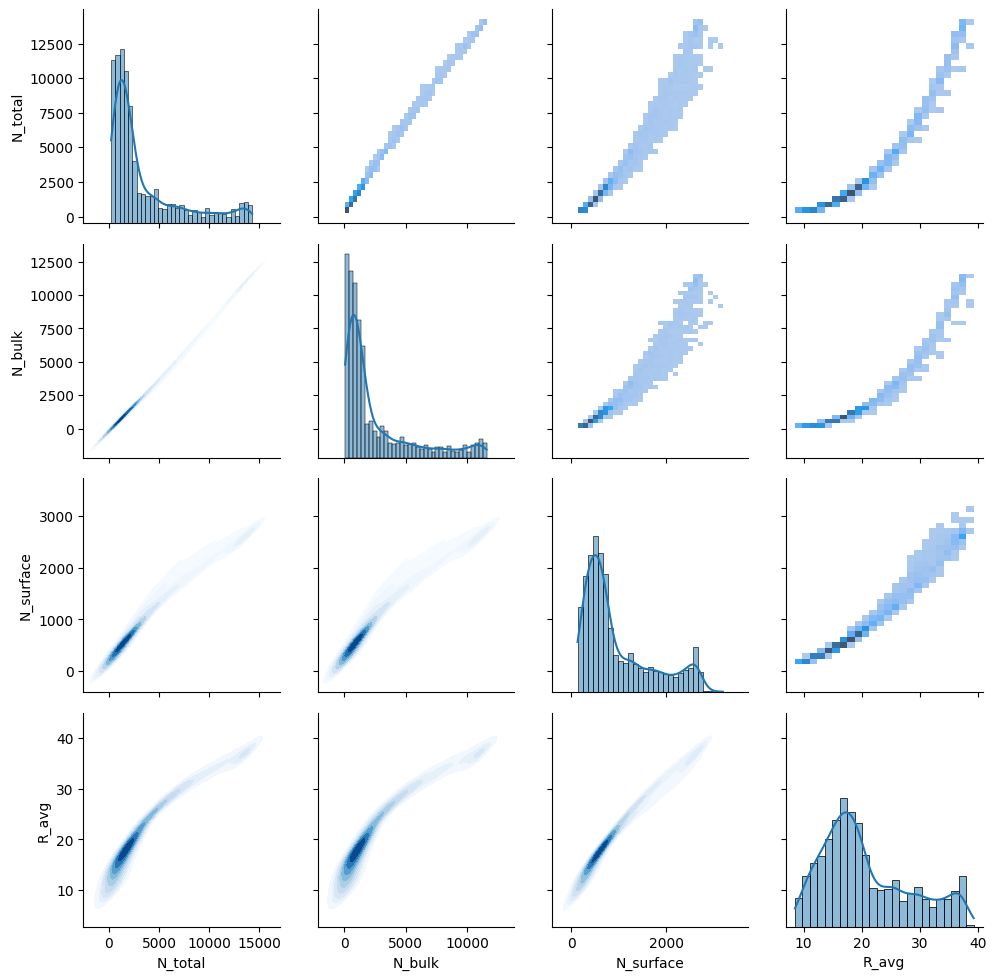

In [20]:
import matplotlib.pyplot as plt

new_df = filtered_df.copy()

g = sns.PairGrid(new_df)

g.map_upper(sns.histplot)

g.map_diag(lambda x, **kwargs: sns.histplot(x, kde=True, **kwargs))

g.map_lower(sns.kdeplot, fill=True, cmap="Blues")

plt.show()
